# Natural language programming

## Introduction

The goal of this assignment is to perform natural language programming and Python’s natural language toolkit (NLTK) and the TextBlob library which is built on the NLTK and text pattern NLP libraries. The two main tasks performed  here are sentiment analysis and similarity analysis. I used web scraper to extract the book review data sets from amazon website.

I'm so into Millennium Series Book written by Stieg Larsson and I believe his death is a great loss of the world. So I choose the first and second books with respect.

## Dataset

first data source: https://www.amazon.com/Girl-Dragon-Tattoo-Millennium-Book-ebook/product-reviews/B0015DROBO/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews

Second data source: https://www.amazon.com/Girl-Played-Fire-Millennium-Book-ebook/dp/B001NLKT60/ref=sr_1_2?dchild=1&qid=1587526251&refinements=p_27%3AStieg+Larsson&s=digital-text&sr=1-2

The two data sets are extracted from the amazon website using data miner built in google chrome extension, that will return the datasets containing 200-300 rows(decided by the users), with attributes including review titles, review text and stars. Even though there are missing values within the data, as we only need review texts and stars in this assignment, this time I'll skip the data cleaning process.

Attribute information will be demonstrated as below

## Load two review data sets

In [2]:
import pandas as pd

In [3]:
reviews1 = pd.read_csv("girl_reviews2.csv") 

In [4]:
reviews2 = pd.read_csv("fire_reviews2.csv")

In [5]:
reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   username         291 non-null    object
 1   date             291 non-null    object
 2   Helpful count    140 non-null    object
 3   stars            291 non-null    object
 4   review title     291 non-null    object
 5   Review text      291 non-null    object
 6   Badges           23 non-null     object
 7   Top Contributor  5 non-null      object
dtypes: object(8)
memory usage: 18.3+ KB


In [6]:
reviews2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   username         310 non-null    object
 1   date             310 non-null    object
 2   Helpful count    113 non-null    object
 3   stars            310 non-null    object
 4   review title     310 non-null    object
 5   Review text      310 non-null    object
 6   Badges           19 non-null     object
 7   Top Contributor  2 non-null      object
dtypes: object(8)
memory usage: 19.5+ KB


Now we got two review data sets that contains around 300 records. The next step we need to do is to detect the same reviewers that both have reviews for two books.

## Detect the same user name in two review data sets

In [7]:
users = [i for i in reviews1.username for j in reviews2.username if i == j and i != "Amazon Customer" and i != "Kindle Customer"]

In [8]:
# find 50 reviewers that give a review on both books
len(users)

50

In [9]:
# verify no duplicate
len(set(users))

50

## Sentiment analysis

### The girl with the dragon tatoo

#### Explore the data

In [10]:
reviews1 = reviews1[reviews1.username.isin(users)]
reviews1.head()

,username,date,Helpful count,stars,review title,Review text,Badges,Top Contributor
4,Teddie S,"Reviewed in the United States on September 21,...",13 people found this helpful,5.0 out of 5 stars,What a great read!,The Girl With the Dragon Tattoo is an intrigui...,NaN,NaN
15,manndrake,"Reviewed in the United States on August 15, 2014",2 people found this helpful,4.0 out of 5 stars,A Fascinating Character,I came to this book late. It had been on the ...,NaN,NaN
22,Mary Wood,"Reviewed in the United States on September 26,...",2 people found this helpful,4.0 out of 5 stars,"Starts very slow, but for good reason; unique ...",(NO MAJOR SPOILERS HERE) - Seeing the first te...,NaN,NaN
23,Davewise,"Reviewed in the United States on November 17, ...",2 people found this helpful,5.0 out of 5 stars,An exciting and engaging mystery,After hearing David Fincher was doing a movie ...,NaN,NaN
25,Solipso,"Reviewed in the United States on January 7, 2012",2 people found this helpful,5.0 out of 5 stars,A fine mystery with a mesmerizing central char...,You do not need to read the second and third v...,NaN,NaN


In [11]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [12]:
reviewlist1 = []
for review in reviews1["Review text"]:
    blob = TextBlob(review, analyzer=NaiveBayesAnalyzer())
    reviewlist1.append(blob)

In [13]:
reviews1.loc[:,["stars", "Review text"]]

,stars,Review text
4,5.0 out of 5 stars,The Girl With the Dragon Tattoo is an intrigui...
15,4.0 out of 5 stars,I came to this book late. It had been on the ...
22,4.0 out of 5 stars,(NO MAJOR SPOILERS HERE) - Seeing the first te...
23,5.0 out of 5 stars,After hearing David Fincher was doing a movie ...
25,5.0 out of 5 stars,You do not need to read the second and third v...
26,4.0 out of 5 stars,"After falling for a clever hoax, financial jou..."
27,5.0 out of 5 stars,Note: I'm trying to write this as a review of ...
28,5.0 out of 5 stars,AUDIOBOOK PRODUCT REVIEWLet me start out by sa...
36,5.0 out of 5 stars,My wife told me I had to read this. That's no...
41,4.0 out of 5 stars,Having heard so much about this book I felt ob...


#### Convert the value in stars to integer only

In [14]:
reviews1["stars"] = [int(i[0]) for i in reviews1.stars]

#### Take a look at every sentiment of review

In [15]:
for i in reviewlist1:
    print(i.sentiment)

Sentiment(classification='pos', p_pos=0.9993667324494211, p_neg=0.0006332675505794259)
Sentiment(classification='pos', p_pos=0.9997081754815225, p_neg=0.00029182451848964644)
Sentiment(classification='pos', p_pos=0.9999999279494706, p_neg=7.20505593601091e-08)
Sentiment(classification='pos', p_pos=1.0, p_neg=7.724980335735011e-15)
Sentiment(classification='pos', p_pos=0.9999991077171978, p_neg=8.922828173259301e-07)
Sentiment(classification='pos', p_pos=0.999999830201082, p_neg=1.697989452294926e-07)
Sentiment(classification='pos', p_pos=1.0, p_neg=7.407312198796695e-15)
Sentiment(classification='pos', p_pos=0.9999999155165316, p_neg=8.448346067163908e-08)
Sentiment(classification='pos', p_pos=0.9999999939796281, p_neg=6.020406825504448e-09)
Sentiment(classification='pos', p_pos=0.9999999999965328, p_neg=3.5063221997350837e-12)
Sentiment(classification='pos', p_pos=1.0, p_neg=2.530795343898572e-15)
Sentiment(classification='pos', p_pos=0.9996250498720929, p_neg=0.00037495012790547704)


KeyboardInterrupt: 

#### calcaulte the predicted stars from the positivity score of sentimient analysis

In [ ]:
reviews1["predicted stars"] = [round(i.sentiment[1]*5) for i in reviewlist1]

In [ ]:
reviews1.loc[:, ["stars", "predicted stars", "Review text"]]

#### the prediction accuracy

In [ ]:
rate1 = [(exp, pred) for exp, pred in zip(reviews1["stars"], reviews1["predicted stars"]) if exp == pred]
len(rate1)/len(reviews1)

#### confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion1 = confusion_matrix(y_true=reviews1["stars"], y_pred=reviews1["predicted stars"])

print('Confusion matrix:')
print(confusion1)

In [ ]:
import seaborn as sns

confusion_df1 = pd.DataFrame(confusion1, index=range(6), columns=range(6))
axes = sns.heatmap(confusion_df1, annot=True, cmap='nipy_spectral_r')

### Summary: By using Naïve Bayes analyzer for NLP sentiment analysis, we found that the prediction accuracy of sentiment rating for girl with the dragon tatoo is 0.64 based on 50 reveiw data.

## The girl who played with fire

#### Explore the data

In [16]:
reviews2 = reviews2[reviews2.username.isin(users)]

In [17]:
reviews2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 2 to 293
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   username         50 non-null     object
 1   date             50 non-null     object
 2   Helpful count    27 non-null     object
 3   stars            50 non-null     object
 4   review title     50 non-null     object
 5   Review text      50 non-null     object
 6   Badges           6 non-null      object
 7   Top Contributor  1 non-null      object
dtypes: object(8)
memory usage: 3.5+ KB


In [18]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [19]:
reviewlist2 = []
for review in reviews2["Review text"]:
    blob = TextBlob(review, analyzer=NaiveBayesAnalyzer())
    reviewlist2.append(blob)

In [20]:
reviews2.loc[:,["stars", "Review text"]]

,stars,Review text
2,4.0 out of 5 stars,This is book #2 in the series by Stieg Larsson...
8,5.0 out of 5 stars,"In lieu of so many reviews, I'll keep the syno..."
11,5.0 out of 5 stars,After having enjoyed the first book in the ser...
12,5.0 out of 5 stars,All this buzz is swirling around about Stieg L...
14,4.0 out of 5 stars,"""The Girl Who Played with Fire"" - luckily I sa..."
16,4.0 out of 5 stars,In this follow up to The Girl With The Dragon ...
17,5.0 out of 5 stars,Warning! Do not read the blurb on this book's ...
19,5.0 out of 5 stars,"Hi,I usually try not to write spoilers. After ..."
20,4.0 out of 5 stars,Note: I'm trying to write this as a review of ...
21,4.0 out of 5 stars,"I enjoyed ""The Girl Who Played with Fire"" slig..."


#### Convert the value in stars to integer only

In [ ]:
reviews2["stars"] = [int(i[0]) for i in reviews2.stars]

#### Take a look at every sentiment of review

In [ ]:
for i in reviewlist2:
    print(i.sentiment)

#### calcaulte the predicted stars from the positivity score of sentimient analysis

In [ ]:
reviews2["predicted stars"] = [round(i.sentiment[1]*5) for i in reviewlist2]

In [ ]:
reviews2.loc[:, ["stars", "predicted stars", "Review text"]]

#### the prediction accuracy

In [ ]:
rate2 = [(exp, pred) for exp, pred in zip(reviews2["stars"], reviews2["predicted stars"]) if exp == pred]
len(rate2)/len(reviews2)

#### confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion2 = confusion_matrix(y_true=reviews2["stars"], y_pred=reviews2["predicted stars"])

print('Confusion matrix:')
print(confusion2)

In [ ]:
import seaborn as sns

confusion_df2 = pd.DataFrame(confusion2, index=range(4), columns=range(4))
axes2 = sns.heatmap(confusion_df2, annot=True, cmap='nipy_spectral_r')

### Summary: By using Naïve Bayes analyzer for NLP sentiment analysis, we found that the prediction accuracy of sentiment rating for the girl who played with fire is 0.56 based on 50 reveiw data. The result is a little lower than first prediction accuracy(0.64).

## Similarity analysis

### Sort two review data sets with the same order in username

In [21]:
r1 = reviews1.sort_values(by = "username")

In [22]:
r2 = reviews2.sort_values(by = "username")

### Compute the similarity on each data point in two review sets

In [23]:
import spacy

nlp = spacy.load('en')  

In [24]:
similarity = []
for i, j in zip(r1["Review text"], r2["Review text"]):
    d1 = nlp(i)
    d2 = nlp(j)
    similarity.append(d1.similarity(d2))

C:\Users\chris\anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
C:\Users\chris\anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larg

C:\Users\chris\anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
C:\Users\chris\anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larg

C:\Users\chris\anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
C:\Users\chris\anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larg

In [25]:
similarity

[0.9165175231964753,
 0.9467625427189323,
 0.9221487943380803,
 0.9584827566951342,
 0.9744197158305393,
 0.8999421622954296,
 0.9423419584202826,
 0.9434463681341281,
 0.9688851676092083,
 0.9439612488614011,
 0.8579640096987708,
 0.9677986665870806,
 0.9405438852077805,
 0.9804357456494058,
 0.9460554002317687,
 0.8903469213050025,
 0.9565435619498283,
 0.9768347607154234,
 0.9827551741030122,
 0.9375949886617445,
 0.8493561601349053,
 0.928721965124611,
 0.9902569767641914,
 0.9635961851630148,
 0.9450178597812244,
 0.9679779409546209,
 0.9529670439399638,
 0.9445406605178608,
 0.9562871833111103,
 0.9807047740645021,
 0.9822476546636761,
 0.9409186194229804,
 0.9445630518645041,
 0.8460165845843325,
 0.9435299556671288,
 0.966053271643755,
 0.9698761114456294,
 0.9316605586119299,
 0.9419243071629646,
 0.9829144459599961,
 0.9475285492520517,
 0.8718169566646358,
 0.9307486572899427,
 0.7192610266809787,
 0.9586026507459965,
 1.0,
 0.9511553764932639,
 0.8459458577493074,
 0.875068

### Dataframe with reviewers along with their reviews on two books and the similarity

In [26]:
r1.index = [i for i in range(50)]

In [27]:
r2.index = [i for i in range(50)]

In [28]:
r3 = pd.concat([r1.loc[:, ["username","Review text"]], r2.loc[:,["Review text"]], pd.Series(similarity)], axis=1)

In [29]:
r3.columns = ["User name", "Review 1", "Review 2", "Similarity"]

In [30]:
r3

,User name,Review 1,Review 2,Similarity
0,A. Langston,AUDIOBOOK PRODUCT REVIEWLet me start out by sa...,REVIEW OF THE AUDIOBOOK PRODUCTSimon Vance aga...,0.916518
1,Bebop,In my xenophobic naivity I pictured this book ...,What more can I say but that she is the most f...,0.946763
2,BooksHugBack,Hmm.. what was all the buzz about? This is th...,'The Girl who Played with Fire' is based solel...,0.922149
3,Born2Late65,"SPOILER ALERT___SPOILER ALERT.Hi,I'm very impr...","Hi,I usually try not to write spoilers. After ...",0.958483
4,Cai Yixin Jeremy,This book is one of those hidden gems that no ...,The Girl who played with Fire suffered from th...,0.974420
5,Combined Text,Mikael Blomkvist is really the protagonist in ...,"The second in the series, 'Fire', relies heavi...",0.899942
6,Dave Edmiston,My wife told me I had to read this. That's no...,The Girl Who Played with Fire is a fantastic s...,0.942342
7,Davewise,After hearing David Fincher was doing a movie ...,After having enjoyed the first book in the ser...,0.943446
8,Doug,"Instead of retelling the story, I'll make a fe...",i don't think you'll be able to take this book...,0.968885
9,EGH923,"I'm always on the lookout for a new, good myst...",This is the second book in the trilogy by the ...,0.943961


In [31]:
r3.Similarity.mean()

0.9360470040848341

### The overall similarity between two books with the same reviewer are around 0.9 to 1.0. The average of similarity is 0.93+, providing high similarity between two book reviews.

### Let's try to sort two review data sets with the different order in username

#### Review 1 sort by A-Z order

In [37]:
r1 = reviews1.sort_values(by = "username")
r1

,username,date,Helpful count,stars,review title,Review text,Badges,Top Contributor
28,A. Langston,"Reviewed in the United States on July 23, 2010",3 people found this helpful,5,THREE STARS for Audiobook Product FIVE STARS F...,AUDIOBOOK PRODUCT REVIEWLet me start out by sa...,NaN,NaN
283,Bebop,"Reviewed in the United States on August 27, 2009",One person found this helpful,5,I almost didn't read this book,In my xenophobic naivity I pictured this book ...,NaN,NaN
94,BooksHugBack,"Reviewed in the United States on July 23, 2010",2 people found this helpful,2,Don't understand the hype.,Hmm.. what was all the buzz about? This is th...,NaN,NaN
90,Born2Late65,"Reviewed in the United States on October 10, 2010",NaN,5,Only one major plot flaw.,"SPOILER ALERT___SPOILER ALERT.Hi,I'm very impr...",NaN,NaN
53,Cai Yixin Jeremy,"Reviewed in the United States on May 26, 2010",NaN,5,The Girl With The Dragon Tattoo by Stieg Larsson,This book is one of those hidden gems that no ...,NaN,NaN
121,Combined Text,"Reviewed in the United States on April 21, 2011",NaN,3,Deatiled and Alive,Mikael Blomkvist is really the protagonist in ...,NaN,NaN
36,Dave Edmiston,"Reviewed in the United States on October 20, 2010",2 people found this helpful,5,Outstanding,My wife told me I had to read this. That's no...,VINE VOICE,NaN
23,Davewise,"Reviewed in the United States on November 17, ...",2 people found this helpful,5,An exciting and engaging mystery,After hearing David Fincher was doing a movie ...,NaN,NaN
224,Doug,"Reviewed in the United States on February 8, 2009",4 people found this helpful,5,Compelling and well Written,"Instead of retelling the story, I'll make a fe...",NaN,NaN
137,EGH923,"Reviewed in the United States on December 30, ...",NaN,5,Great read!!!!,"I'm always on the lookout for a new, good myst...",NaN,NaN


#### Review 2 sort by A-Z asceding order

In [38]:
r2_r = reviews2.sort_values(by = "username", ascending=False)
r2_r

,username,date,Helpful count,stars,review title,Review text,Badges,Top Contributor
101,snake plisken,"Reviewed in the United States on October 9, 2010",One person found this helpful,5.0 out of 5 stars,A great second act that leaves you wanting more,I had read a few mild reviews before I bought ...,NaN,NaN
279,shar,"Reviewed in the United States on January 15, 2014",NaN,5.0 out of 5 stars,Yes I am a fan,I think a rabid ran would be it. Loved this s...,NaN,NaN
199,manndrake,"Reviewed in the United States on January 7, 2015",One person found this helpful,5.0 out of 5 stars,A Ripping Yarn,In this second volume of the Millennium Trilog...,NaN,NaN
8,doc peterson,"Reviewed in the United States on August 2, 2010",5 people found this helpful,5.0 out of 5 stars,I liked this much better than his debut,"In lieu of so many reviews, I'll keep the syno...",NaN,NaN
122,Willow,"Reviewed in the United States on February 13, ...",NaN,4.0 out of 5 stars,"Needed Editing for Content, but otherwise, eng...",These books were published after Steig Larsson...,NaN,NaN
21,Westley,"Reviewed in the United States on October 31, 2010",One person found this helpful,4.0 out of 5 stars,"""There are no innocents. There are, however, d...","I enjoyed ""The Girl Who Played with Fire"" slig...",NaN,NaN
157,W. L. LaCroix,"Reviewed in the United States on March 6, 2019",NaN,5.0 out of 5 stars,Engrossing,This series is so good. I read them during ou...,NaN,NaN
39,Victoria,"Reviewed in the United States on May 24, 2010",One person found this helpful,3.0 out of 5 stars,Lacks A Punch,Girl with a Dragon Tattoo was my favorite book...,NaN,NaN
36,Vee W.,"Reviewed in the United States on September 10,...",NaN,3.0 out of 5 stars,Un-expected.,It took me a long time to decide to read this ...,NaN,NaN
192,Twinkle Toes,"Reviewed in the United States on August 16, 2009",2 people found this helpful,5.0 out of 5 stars,"WoW Wow Wow,",I read the first in series The Girl with the D...,NaN,NaN


### Compute the similarity on each data point in two review sets

In [39]:
import spacy

nlp = spacy.load('en')  

In [41]:
similarity = []
for i, j in zip(r1["Review text"], r2_r["Review text"]):
    d1 = nlp(i)
    d2 = nlp(j)
    similarity.append(d1.similarity(d2))

C:\Users\chris\anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
C:\Users\chris\anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larg

C:\Users\chris\anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
C:\Users\chris\anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larg

C:\Users\chris\anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
C:\Users\chris\anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larg

In [42]:
similarity

[0.8981896703653622,
 0.8901000499773348,
 0.7969286149923981,
 0.9130622479137114,
 0.9056875260084062,
 0.9269201155485308,
 0.8376868683420351,
 0.9430777762924103,
 0.8935640538320281,
 0.9298222425715589,
 0.9044876079955105,
 0.9591048766366458,
 0.8898880556044649,
 0.8604195825846498,
 0.9524108008874911,
 0.8211059010797994,
 0.8675820200025773,
 0.9542773358661989,
 0.9129427895955503,
 0.9516475132577528,
 0.9078927601422956,
 0.8949591910964662,
 0.963007211274417,
 0.9516204251089028,
 0.9092770474585239,
 0.9128481607425576,
 0.9544105585280728,
 0.9725324734229496,
 0.9196635902958469,
 0.9088337659675197,
 0.9498175500582384,
 0.8380943246637461,
 0.9388121984924469,
 0.8032980782834601,
 0.9033072929310755,
 0.9346445844043318,
 0.8740397548289432,
 0.8113576615997733,
 0.9300505848362502,
 0.9403621663760906,
 0.9338405466441553,
 0.8695704830671577,
 0.9246992377515957,
 0.8687000189732634,
 0.8648587276768983,
 0.9060268650042886,
 0.8726250946936297,
 0.91739922686

#### Mean of similarity for different user

In [46]:
import statistics 
statistics.mean(similarity)

0.9033055173961901

### However, when we shuffle two reviews by different username, the average of similarity is 0.90. It still providing high similarity even they are different reviewers. It might because the writing way that reviewers used for a same series book is very similar. Or the similarity from this model is not very accurate when detect book reviews.

## Other experiments

### Visualizing Word Frequencies with Pandas

#### Loading the Data

In [47]:
from pathlib import Path
from textblob import TextBlob

### The girl with the dragon tatoo

In [48]:
reviews1.head()

,username,date,Helpful count,stars,review title,Review text,Badges,Top Contributor
4,Teddie S,"Reviewed in the United States on September 21,...",13 people found this helpful,5,What a great read!,The Girl With the Dragon Tattoo is an intrigui...,NaN,NaN
15,manndrake,"Reviewed in the United States on August 15, 2014",2 people found this helpful,4,A Fascinating Character,I came to this book late. It had been on the ...,NaN,NaN
22,Mary Wood,"Reviewed in the United States on September 26,...",2 people found this helpful,4,"Starts very slow, but for good reason; unique ...",(NO MAJOR SPOILERS HERE) - Seeing the first te...,NaN,NaN
23,Davewise,"Reviewed in the United States on November 17, ...",2 people found this helpful,5,An exciting and engaging mystery,After hearing David Fincher was doing a movie ...,NaN,NaN
25,Solipso,"Reviewed in the United States on January 7, 2012",2 people found this helpful,5,A fine mystery with a mesmerizing central char...,You do not need to read the second and third v...,NaN,NaN


In [49]:
text = ''
for review in reviews1["Review text"]:
    text += review + ' '
    
blob = TextBlob(text)
items = blob.word_counts.items()

#### Eliminating the Stop Words

In [50]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

items = [item for item in items if item[0] not in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
from operator import itemgetter

sorted_items = sorted(items, key=itemgetter(1), reverse=True)

#### Sorting the Words by Frequency

In [52]:
sorted_items

[('book', 147),
 ("n't", 71),
 ('read', 71),
 ('story', 67),
 ('larsson', 64),
 ('girl', 53),
 ('mystery', 52),
 ('characters', 50),
 ('vanger', 50),
 ('novel', 45),
 ('one', 43),
 ('like', 42),
 ('salander', 38),
 ('family', 36),
 ('character', 35),
 ('blomkvist', 34),
 ('mikael', 32),
 ('would', 31),
 ('dragon', 30),
 ('many', 30),
 ('first', 30),
 ('lisbeth', 30),
 ('tattoo', 29),
 ('reading', 29),
 ('henrik', 29),
 ('swedish', 28),
 ('also', 27),
 ('plot', 27),
 ('books', 26),
 ('well', 25),
 ('harriet', 25),
 ('journalist', 24),
 ('really', 24),
 ('good', 23),
 ('two', 22),
 ('time', 22),
 ('sweden', 22),
 ('know', 22),
 ('could', 22),
 ('author', 22),
 ('found', 21),
 ('series', 21),
 ('way', 21),
 ('writing', 21),
 ('financial', 20),
 ('get', 20),
 ('years', 19),
 ('even', 19),
 ('trilogy', 19),
 ('find', 18),
 ('much', 18),
 ('interesting', 18),
 ('end', 17),
 ('stieg', 17),
 ('reader', 17),
 ('best', 16),
 ('case', 16),
 ('lot', 16),
 ('think', 16),
 ('something', 15),
 ('see'

### Getting the Top 100 Words into a Dataframe

In [53]:
import pandas as pd

top100 = sorted_items[0:100]
df1 = pd.DataFrame(top100, columns=['word', 'count'])  
df1

,word,count
0,book,147
1,n't,71
2,read,71
3,story,67
4,larsson,64
...,...,...
95,worth,11
96,give,11
97,new,11
98,great,11


#### Displayed the TOP 20 frequency words by graph

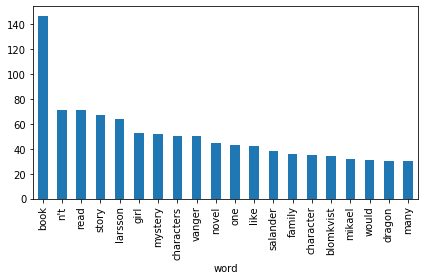

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.DataFrame(sorted_items[0:20], columns=['word', 'count'])  
axes = df.plot.bar(x='word', y='count', legend=False)
plt.gcf().tight_layout()

### The girl who played with fire

In [55]:
text = ''
for review in reviews2["Review text"]:
    text += review + ' '
    
blob = TextBlob(text)
items = blob.word_counts.items()

#### Eliminating the Stop Words

In [56]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

items = [item for item in items if item[0] not in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Sorting the Words by Frequency

In [57]:
from operator import itemgetter

sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [58]:
import pandas as pd

top100 = sorted_items[0:100]
df2 = pd.DataFrame(top100, columns=['word', 'count'])  
df2

,word,count
0,book,181
1,salander,88
2,first,88
3,one,74
4,n't,66
...,...,...
95,readers,9
96,part,9
97,next,9
98,old,9


#### Displayed the TOP 20 frequency words by graph

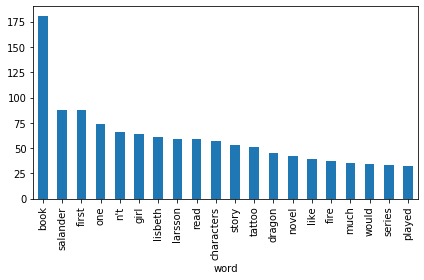

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.DataFrame(sorted_items[0:20], columns=['word', 'count'])  
axes = df.plot.bar(x='word', y='count', legend=False)
plt.gcf().tight_layout()

In [60]:
df1

,word,count
0,book,147
1,n't,71
2,read,71
3,story,67
4,larsson,64
...,...,...
95,worth,11
96,give,11
97,new,11
98,great,11


In [61]:
df2

,word,count
0,book,181
1,salander,88
2,first,88
3,one,74
4,n't,66
...,...,...
95,readers,9
96,part,9
97,next,9
98,old,9


### Comparing the top 100 frequency words from reviewers in two books

In [62]:
words = []
for i in range(100):
    for j in range(100):
        if df1.loc[i][0] == df2.loc[j][0]:
            words.append(df1.loc[i][0])
            break

#### list the same words

In [63]:
words

['book',
 "n't",
 'read',
 'story',
 'larsson',
 'girl',
 'mystery',
 'characters',
 'novel',
 'one',
 'like',
 'salander',
 'character',
 'blomkvist',
 'mikael',
 'would',
 'dragon',
 'many',
 'first',
 'lisbeth',
 'tattoo',
 'reading',
 'swedish',
 'also',
 'plot',
 'books',
 'well',
 'journalist',
 'really',
 'good',
 'two',
 'time',
 'sweden',
 'know',
 'could',
 'author',
 'found',
 'series',
 'way',
 'get',
 'even',
 'trilogy',
 'find',
 'much',
 'interesting',
 'end',
 'stieg',
 'reader',
 'lot',
 'think',
 'three',
 'people',
 'bit',
 'however',
 'made',
 'say',
 'part',
 'murder',
 'next',
 'life',
 'back',
 'going',
 'little',
 'give',
 'things']

### Compute the same high frequency words between two books

In [64]:
highest_frequency_words_p = len(words)/100

In [65]:
highest_frequency_words_p

0.65

In [66]:
print('same high frequency words between two books:', highest_frequency_words_p)

same high frequency words between two books: 0.65
